#Import relevant packages

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno
import datetime

#Load in Data

In [82]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/seattle_rain.csv')

In [83]:
df_ny = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/ny_rain.csv')

##print out the dataframes to see data and headers

In [84]:
df_seattle.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,82.9,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,135.0,2020-01-01,NaN,NaN,0.23,NaN,NaN,NaN,NaN
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,48.2,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,74.1,2020-01-01,NaN,NaN,0.13,NaN,NaN,NaN,NaN
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,112.5,2020-01-01,NaN,NaN,0.22,NaN,NaN,NaN,NaN


##There are many irrelevant columns in this data frame which we will need to remove

In [85]:
df_ny.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,42.7,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
1,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,117.3,2020-01-01,NaN,NaN,0.06,0.0,0.0,NaN,NaN
2,US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,4.3,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
3,USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734430,-73.416370,22.8,2020-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,43.3,2020-01-01,NaN,NaN,0.00,0.0,NaN,NaN,NaN


##Check data types,see if any data needs to be transformed.


In [86]:
df_seattle.dtypes #Check data types

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

In [87]:
df_ny.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

###In this case the Date needs to be changed from an object into DateTime

##Check the number of rows

In [88]:
df_seattle.shape #check number of rows and columns

(7003, 13)

In [89]:
df_ny.shape #New York has more stations, will need to deal with this later

(17465, 13)

###New york data frame has many more entries. Both data frames must be made to have the same amount of rows before they are merged.

###Visualize and investigate data using matplotlib

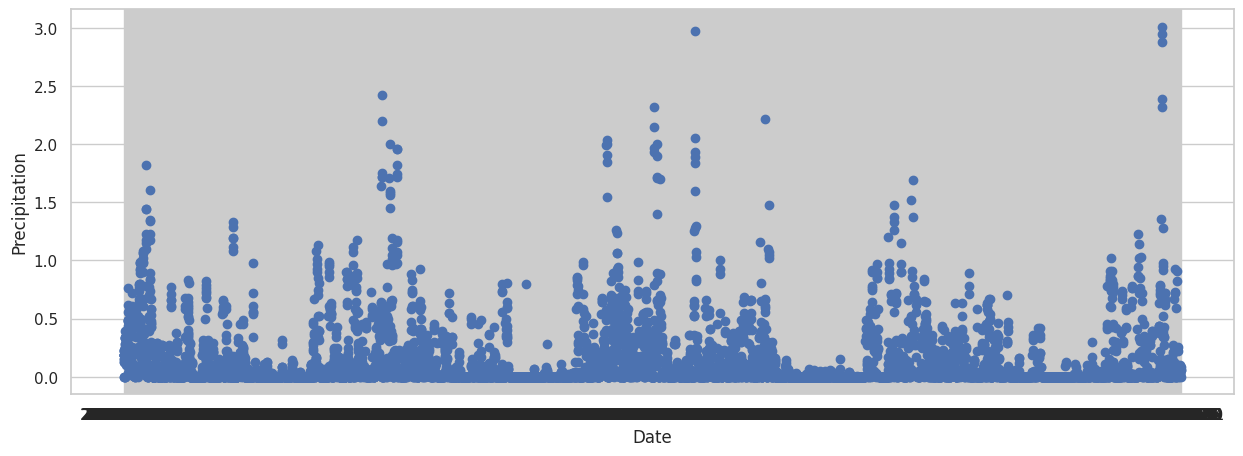

In [90]:
fig, ax = plt.subplots()
ax.scatter(df_seattle["DATE"], df_seattle["PRCP"])
ax.set_ylabel("Precipitation")
ax.set_xlabel("Date")
fig.set_size_inches(15, 5)


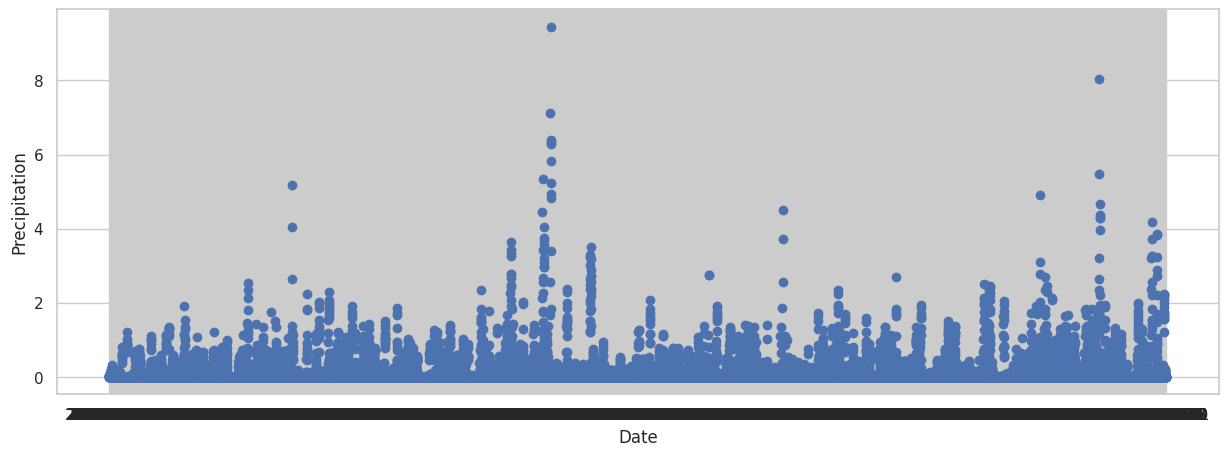

In [91]:
fig, ax = plt.subplots()
ax.scatter(df_ny["DATE"], df_ny["PRCP"])
ax.set_ylabel("Precipitation")
ax.set_xlabel("Date")
fig.set_size_inches(15, 5)

##Based on the scatter plots, both cities seem to have similar amounts of rain, but New York has more extreme outliers

##Convert Date column to datetime to make it easier to work with

Afterwards, check for any Null values

In [92]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE']) #convert Date column to DateTime data type
df_ny['DATE'] = pd.to_datetime(df_ny['DATE'])

In [93]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    7003 non-null   object        
 1   NAME       7003 non-null   object        
 2   LATITUDE   7003 non-null   float64       
 3   LONGITUDE  7003 non-null   float64       
 4   ELEVATION  7003 non-null   float64       
 5   DATE       7003 non-null   datetime64[ns]
 6   DAPR       143 non-null    float64       
 7   MDPR       143 non-null    float64       
 8   PRCP       6718 non-null   float64       
 9   SNOW       3006 non-null   float64       
 10  SNWD       1331 non-null   float64       
 11  DASF       0 non-null      float64       
 12  MDSF       0 non-null      float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 711.4+ KB


###Remove columns that are irrelevant to the research question

In [94]:
#remove all columns listed under 'bad columns'
columns_remove = ["ELEVATION", "DAPR", "MDPR", "SNOW", "SNWD", "DASF", "MDSF"]
df_seattle = df_seattle.drop(columns = columns_remove)
df_ny = df_ny.drop(columns = columns_remove)

In [95]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    7003 non-null   object        
 1   NAME       7003 non-null   object        
 2   LATITUDE   7003 non-null   float64       
 3   LONGITUDE  7003 non-null   float64       
 4   DATE       7003 non-null   datetime64[ns]
 5   PRCP       6718 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 328.4+ KB


###New York data frame has more entries than Seattle Data frame. Reconcile this discrepancy by averaging all stations for each city

In [96]:
#Dealing with Station and number mismatch before join
df_seattle_avg = df_seattle.groupby(by="DATE", as_index = False)["PRCP"].mean()
df_ny_avg = df_ny.groupby(by="DATE", as_index = False)["PRCP"].mean()

In [97]:
print(len(df_ny_avg) == len(df_seattle_avg)) #Check that both data frames are same length

True


Test proves that both data frames now contain the same number of entries

#The Data frame is missing some values. Interpolate them, estimating what the missing values would be

In [98]:
#Use interpolate to fill in missing values
df_ny_avg["precip_interpolate"] = df_ny_avg["PRCP"].interpolate()
df_seattle_avg["precip_interpolate"] = df_seattle_avg["PRCP"].interpolate()
df_ny_avg["precip_interpolate"].isna().sum()
df_seattle_avg["precip_interpolate"].isna().sum()


0

#Merge the Data Frames on the 'DATE' column

In [99]:
#Merge the data frames

df_seattle_prcp = df_seattle_avg[['DATE','PRCP']]
df_ny_prcp = df_ny_avg[['DATE','PRCP']] #Select the two desired columns from each data frame in preparation to join them




df_merged = df_seattle_prcp.merge(df_ny_prcp, on = 'DATE', how = 'inner') #Merge the two data frames
print(df_merged)



           DATE    PRCP_x    PRCP_y
0    2020-01-01  0.162500  0.013333
1    2020-01-02  0.181250  0.000000
2    2020-01-03  0.267500  0.134444
3    2020-01-04  0.172000  0.200000
4    2020-01-05  0.168571  0.040000
...         ...       ...       ...
1456 2023-12-27  0.063333  0.051538
1457 2023-12-28  0.240000  1.845000
1458 2023-12-29  0.055000  0.103571
1459 2023-12-30  0.042500  0.006429
1460 2023-12-31  0.050000  0.000714

[1461 rows x 3 columns]


#Make Merged Data Frame tidy

In [100]:

df_tidy = pd.melt(df_merged, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')

df_tidy.loc[df_tidy['CITY'] == 'PRCP_x', 'CITY'] = 'seattle'
df_tidy.loc[df_tidy['CITY'] == 'PRCP_y', 'CITY'] = 'new york'
print(df_tidy)

           DATE      CITY      PRCP
0    2020-01-01   seattle  0.162500
1    2020-01-02   seattle  0.181250
2    2020-01-03   seattle  0.267500
3    2020-01-04   seattle  0.172000
4    2020-01-05   seattle  0.168571
...         ...       ...       ...
2917 2023-12-27  new york  0.051538
2918 2023-12-28  new york  1.845000
2919 2023-12-29  new york  0.103571
2920 2023-12-30  new york  0.006429
2921 2023-12-31  new york  0.000714

[2922 rows x 3 columns]


##Rename columns for understandability and best practice

In [101]:
rename_dict = {"DATE":"date", "CITY":"city", "PRCP":"precipitation"}

df = df_tidy.rename(columns=rename_dict)
print(df)

           date      city  precipitation
0    2020-01-01   seattle       0.162500
1    2020-01-02   seattle       0.181250
2    2020-01-03   seattle       0.267500
3    2020-01-04   seattle       0.172000
4    2020-01-05   seattle       0.168571
...         ...       ...            ...
2917 2023-12-27  new york       0.051538
2918 2023-12-28  new york       1.845000
2919 2023-12-29  new york       0.103571
2920 2023-12-30  new york       0.006429
2921 2023-12-31  new york       0.000714

[2922 rows x 3 columns]


##export new merged, cleaned and tidy csv

In [102]:
df.to_csv("merged_weather_data.csv", index = False)